In [7]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [8]:
!pip install ultralytics==8.0.20

In [9]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [10]:
from ultralytics import YOLO
from IPython.display import Image, display

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Bi1h6o9fF3eRp0N8ECHE")
project = rf.workspace("inzynierkaogien").project("fire-detection-small")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to fire-detection-small-1 in yolov8:: 100%|██████████| 1436/1436 [00:00<00:00, 3384.42it/s]


In [13]:
%cd {HOME}

!yolo task = detect mode = train model = yolov8s.pt data = {dataset.location}/data.yaml epochs = 4 imgsz = 640 plots = True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/fire-detection-small-1/data.yaml, epochs=4, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

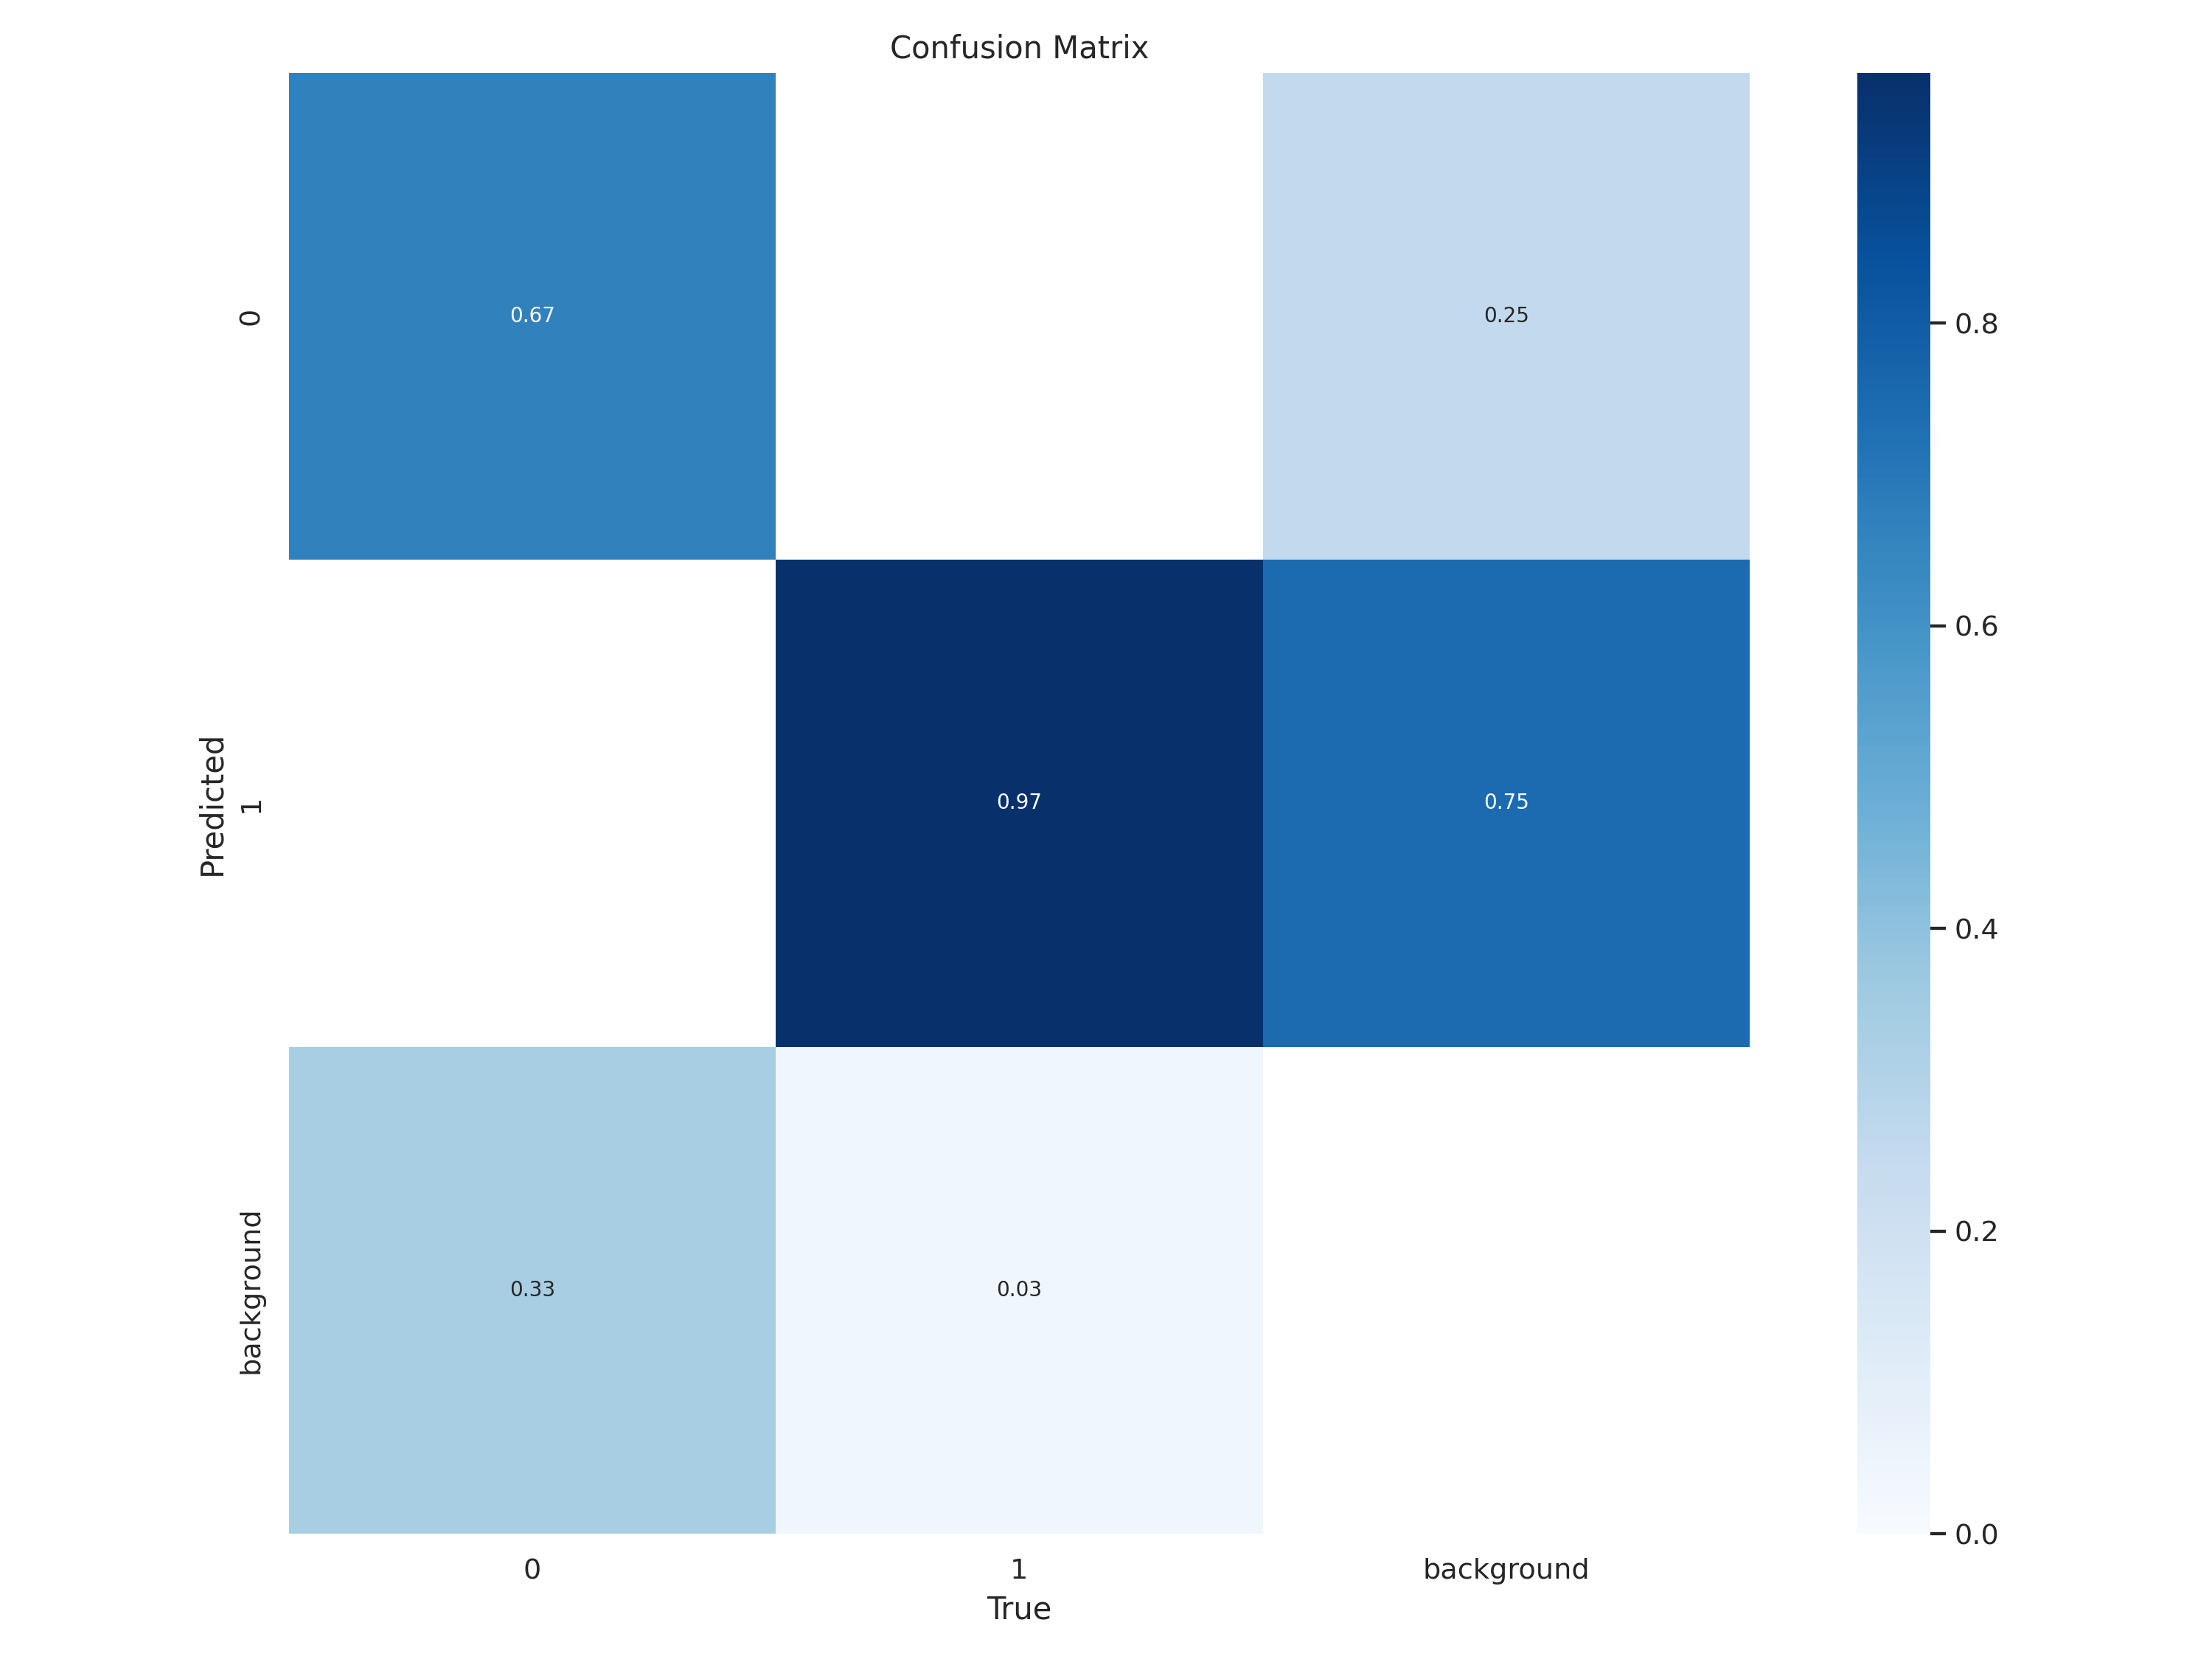

In [17]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=750)

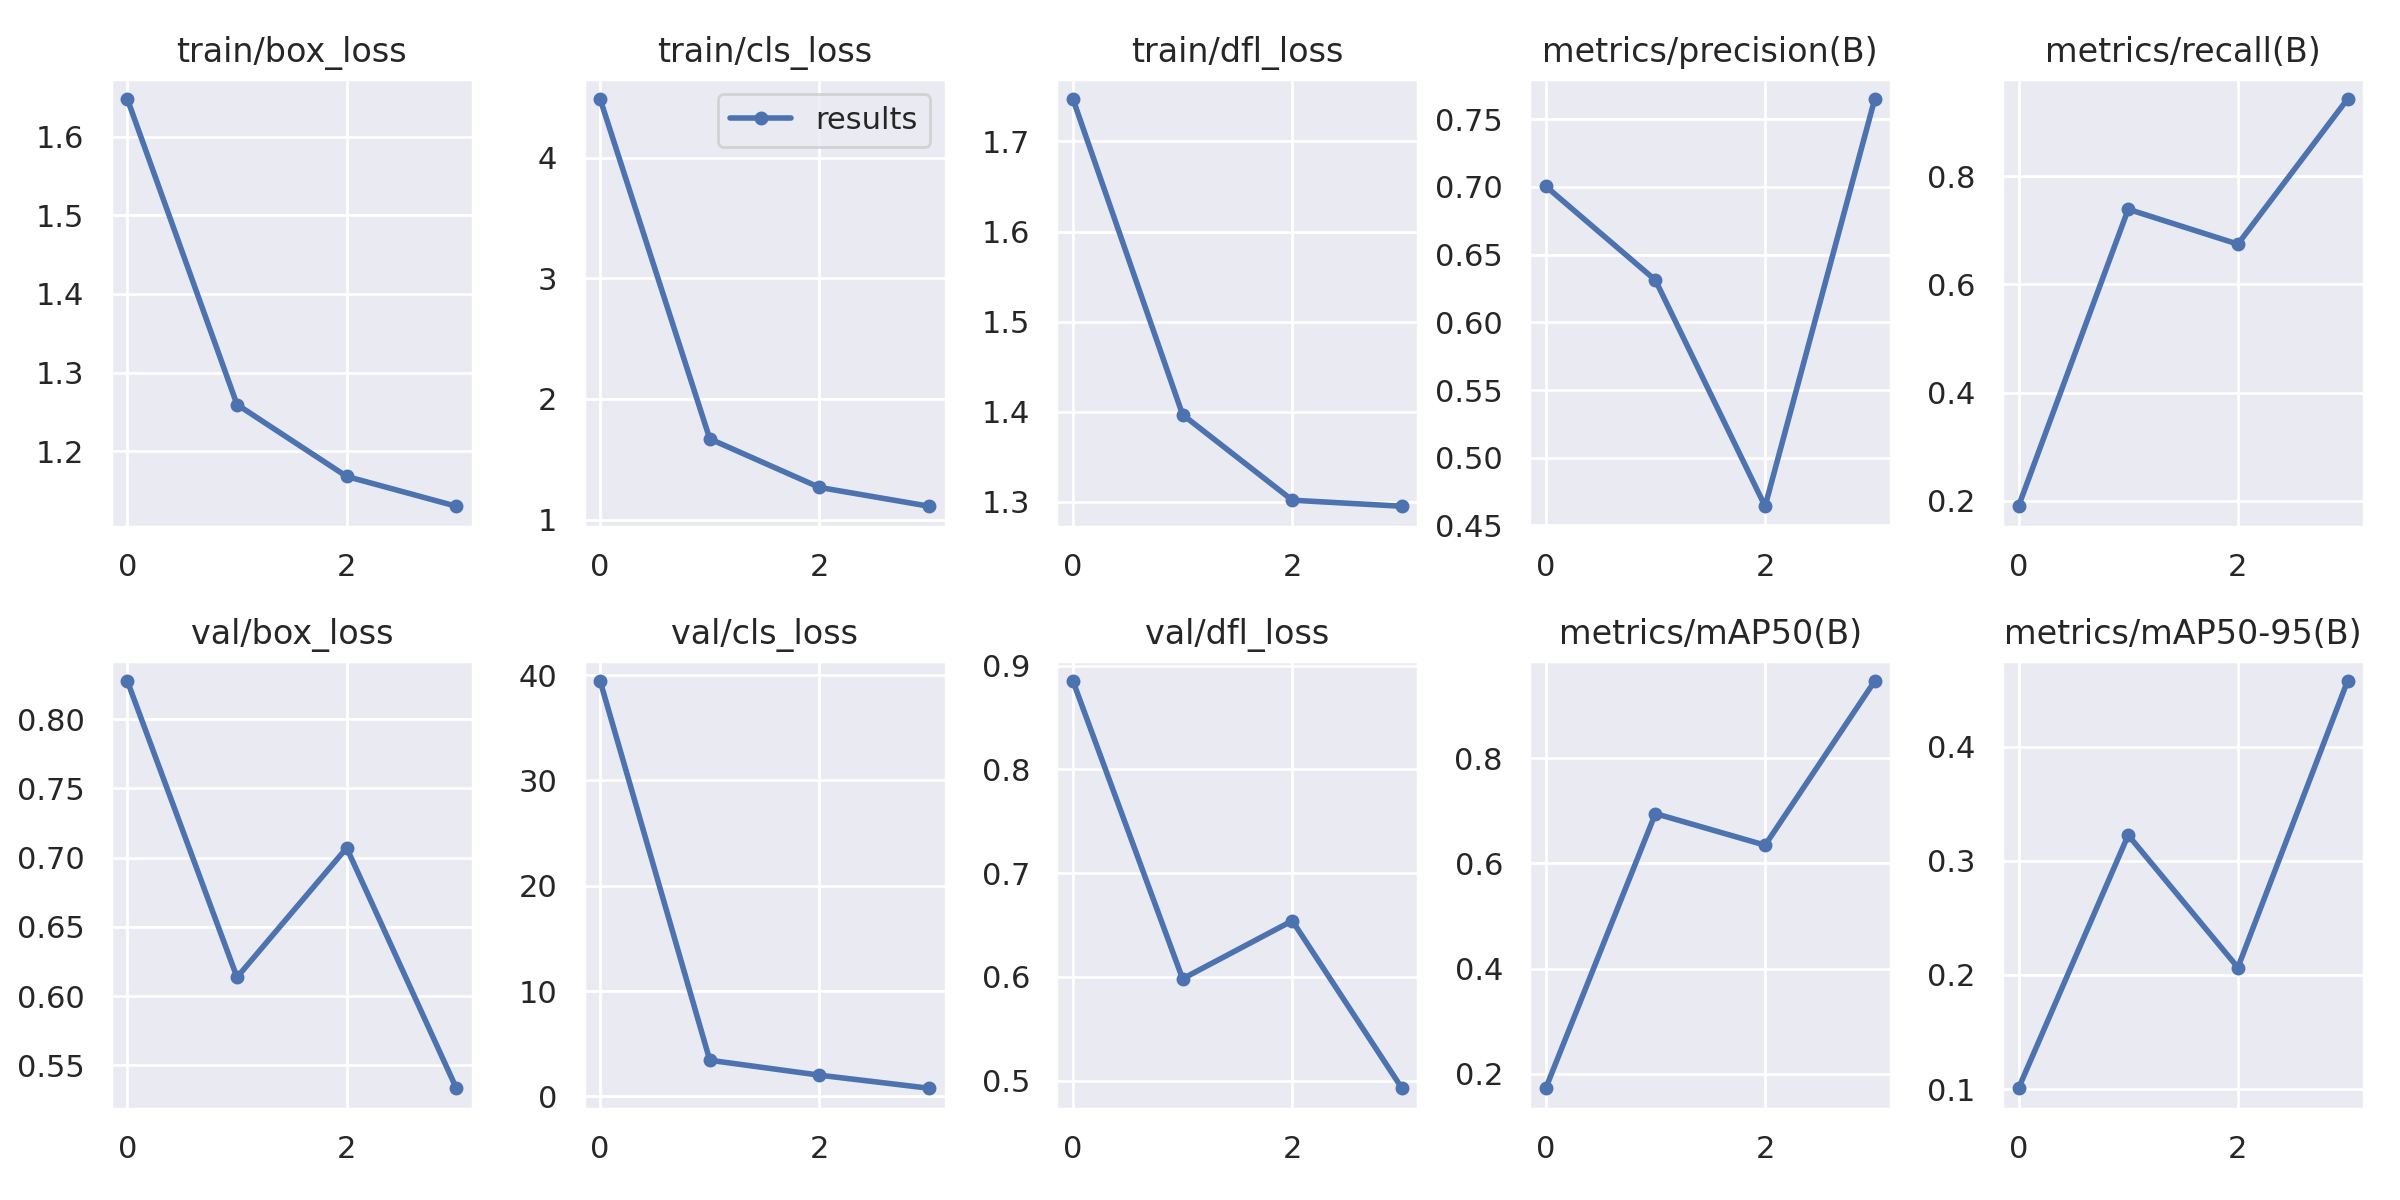

In [18]:
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=750)

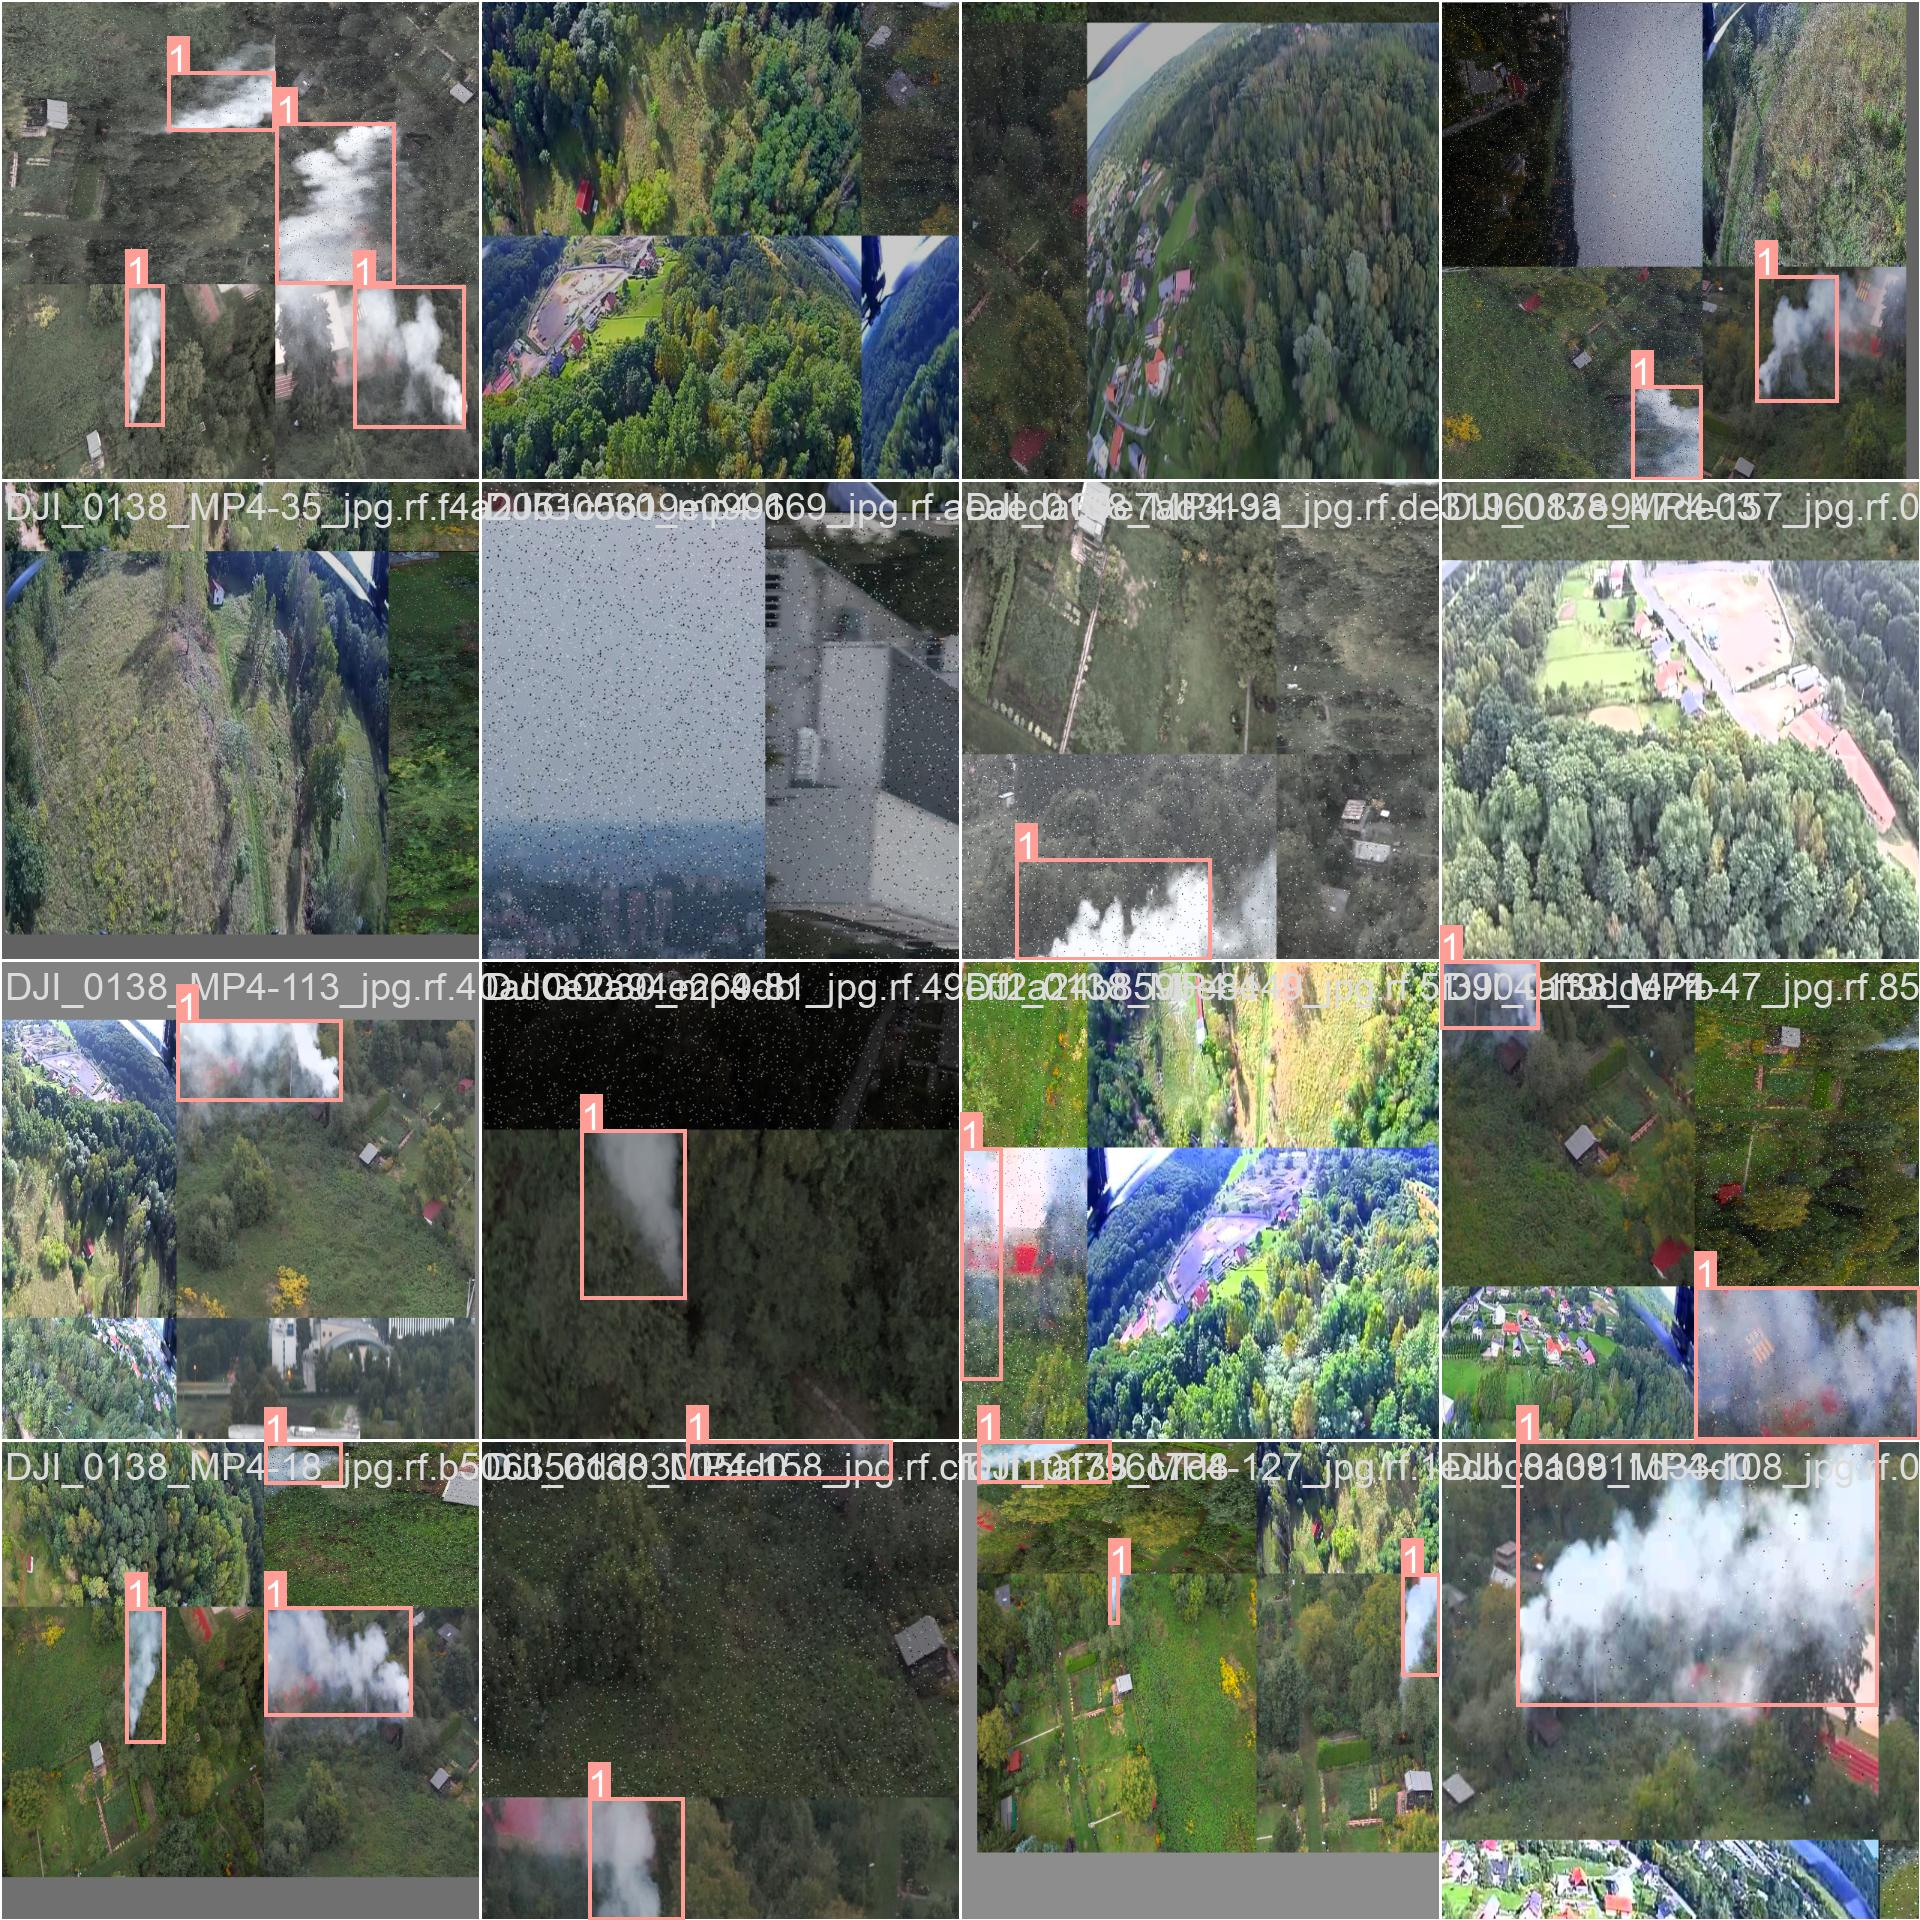

In [19]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch0.jpg', width=750)

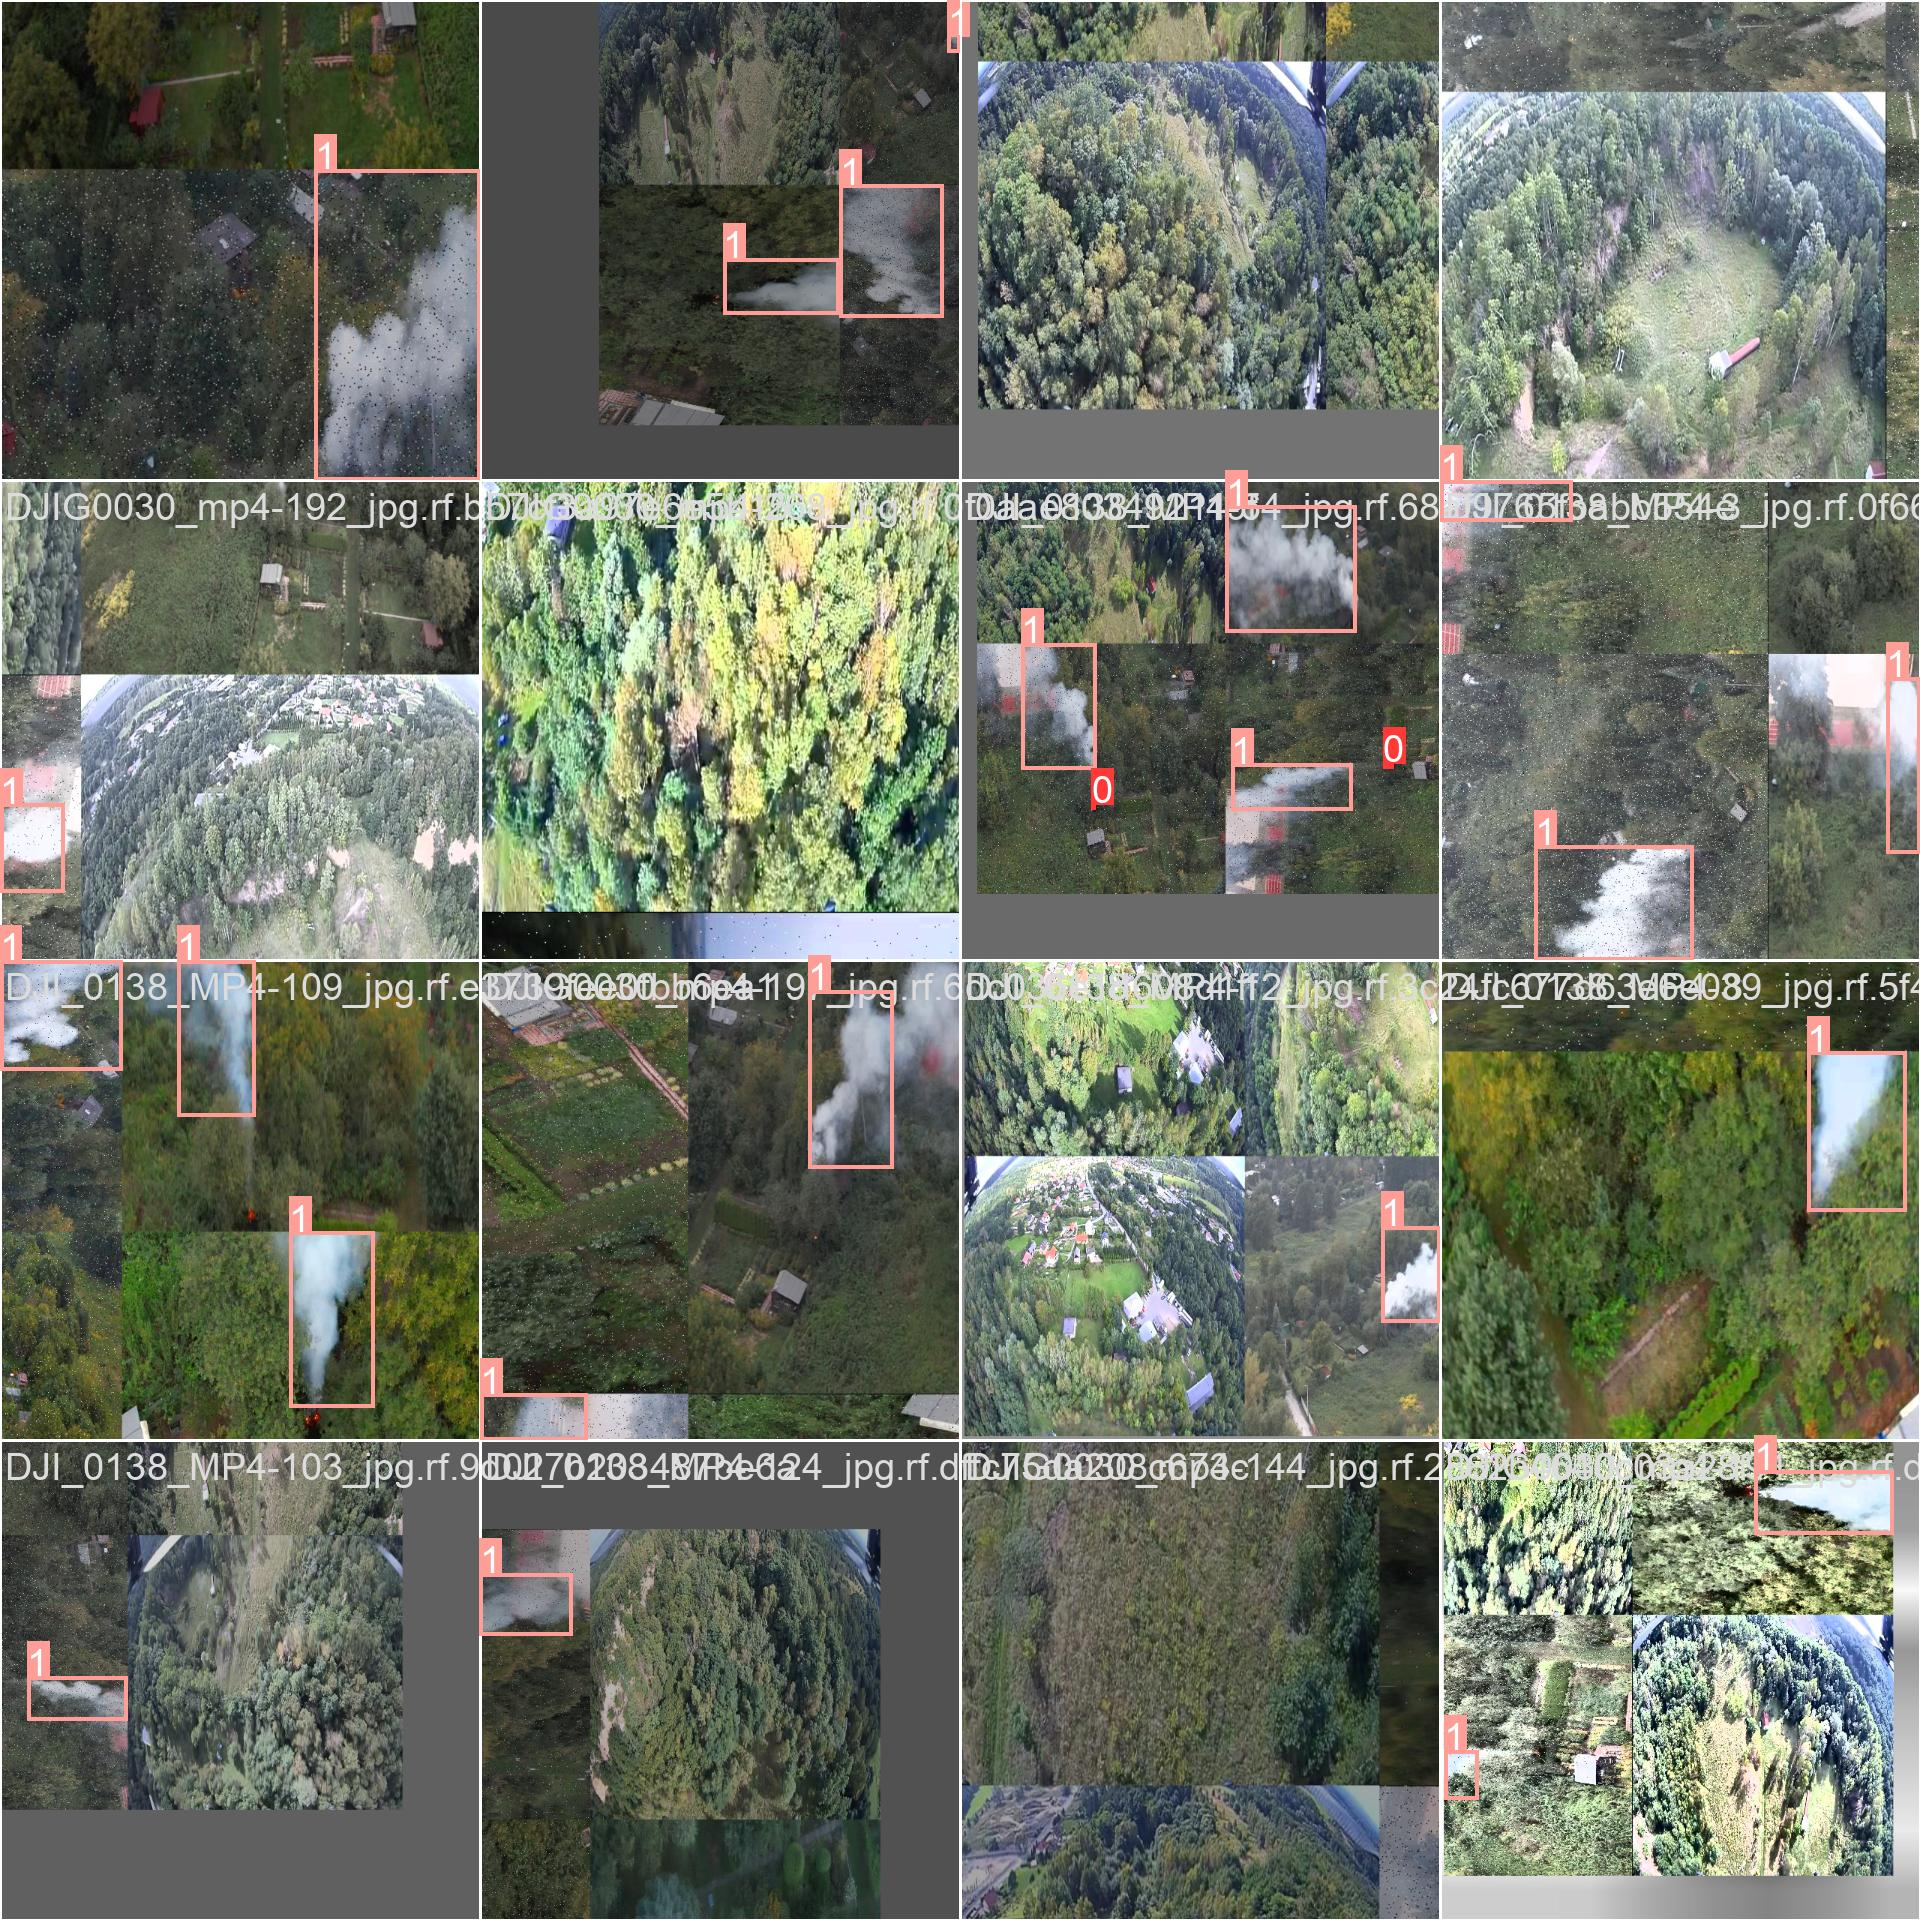

In [20]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch1.jpg', width=750)

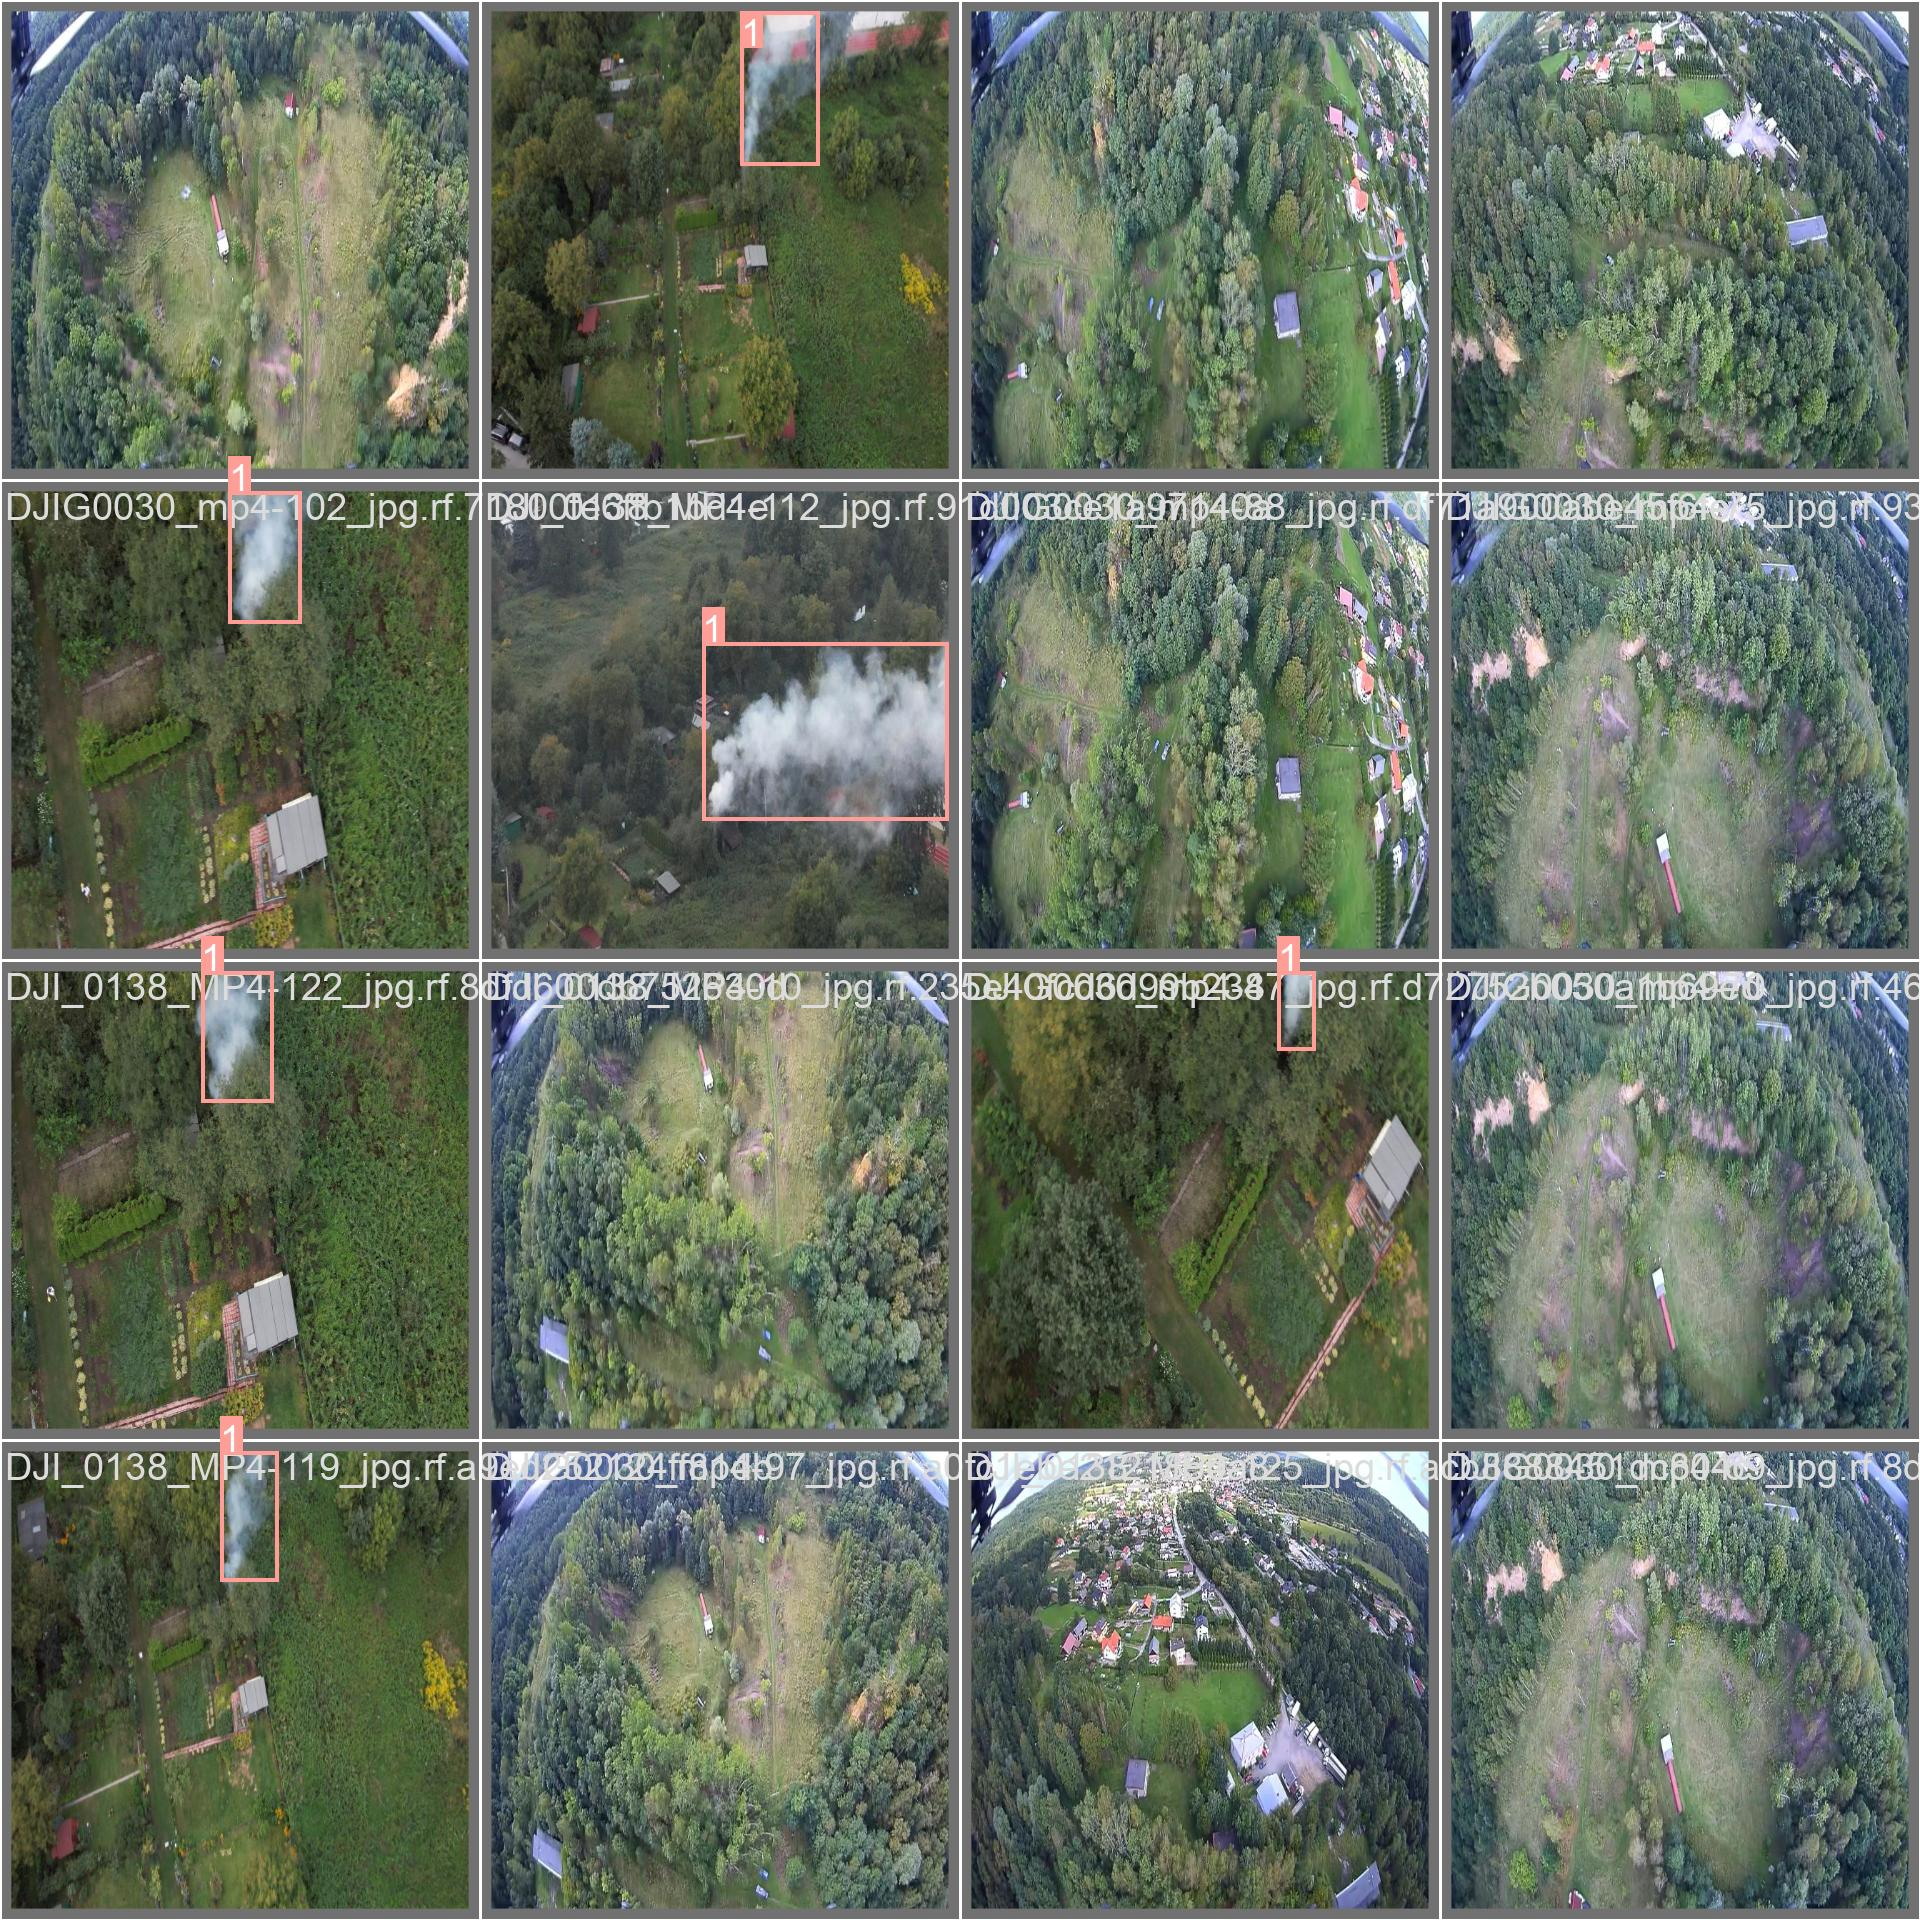

In [21]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_labels.jpg', width=750)

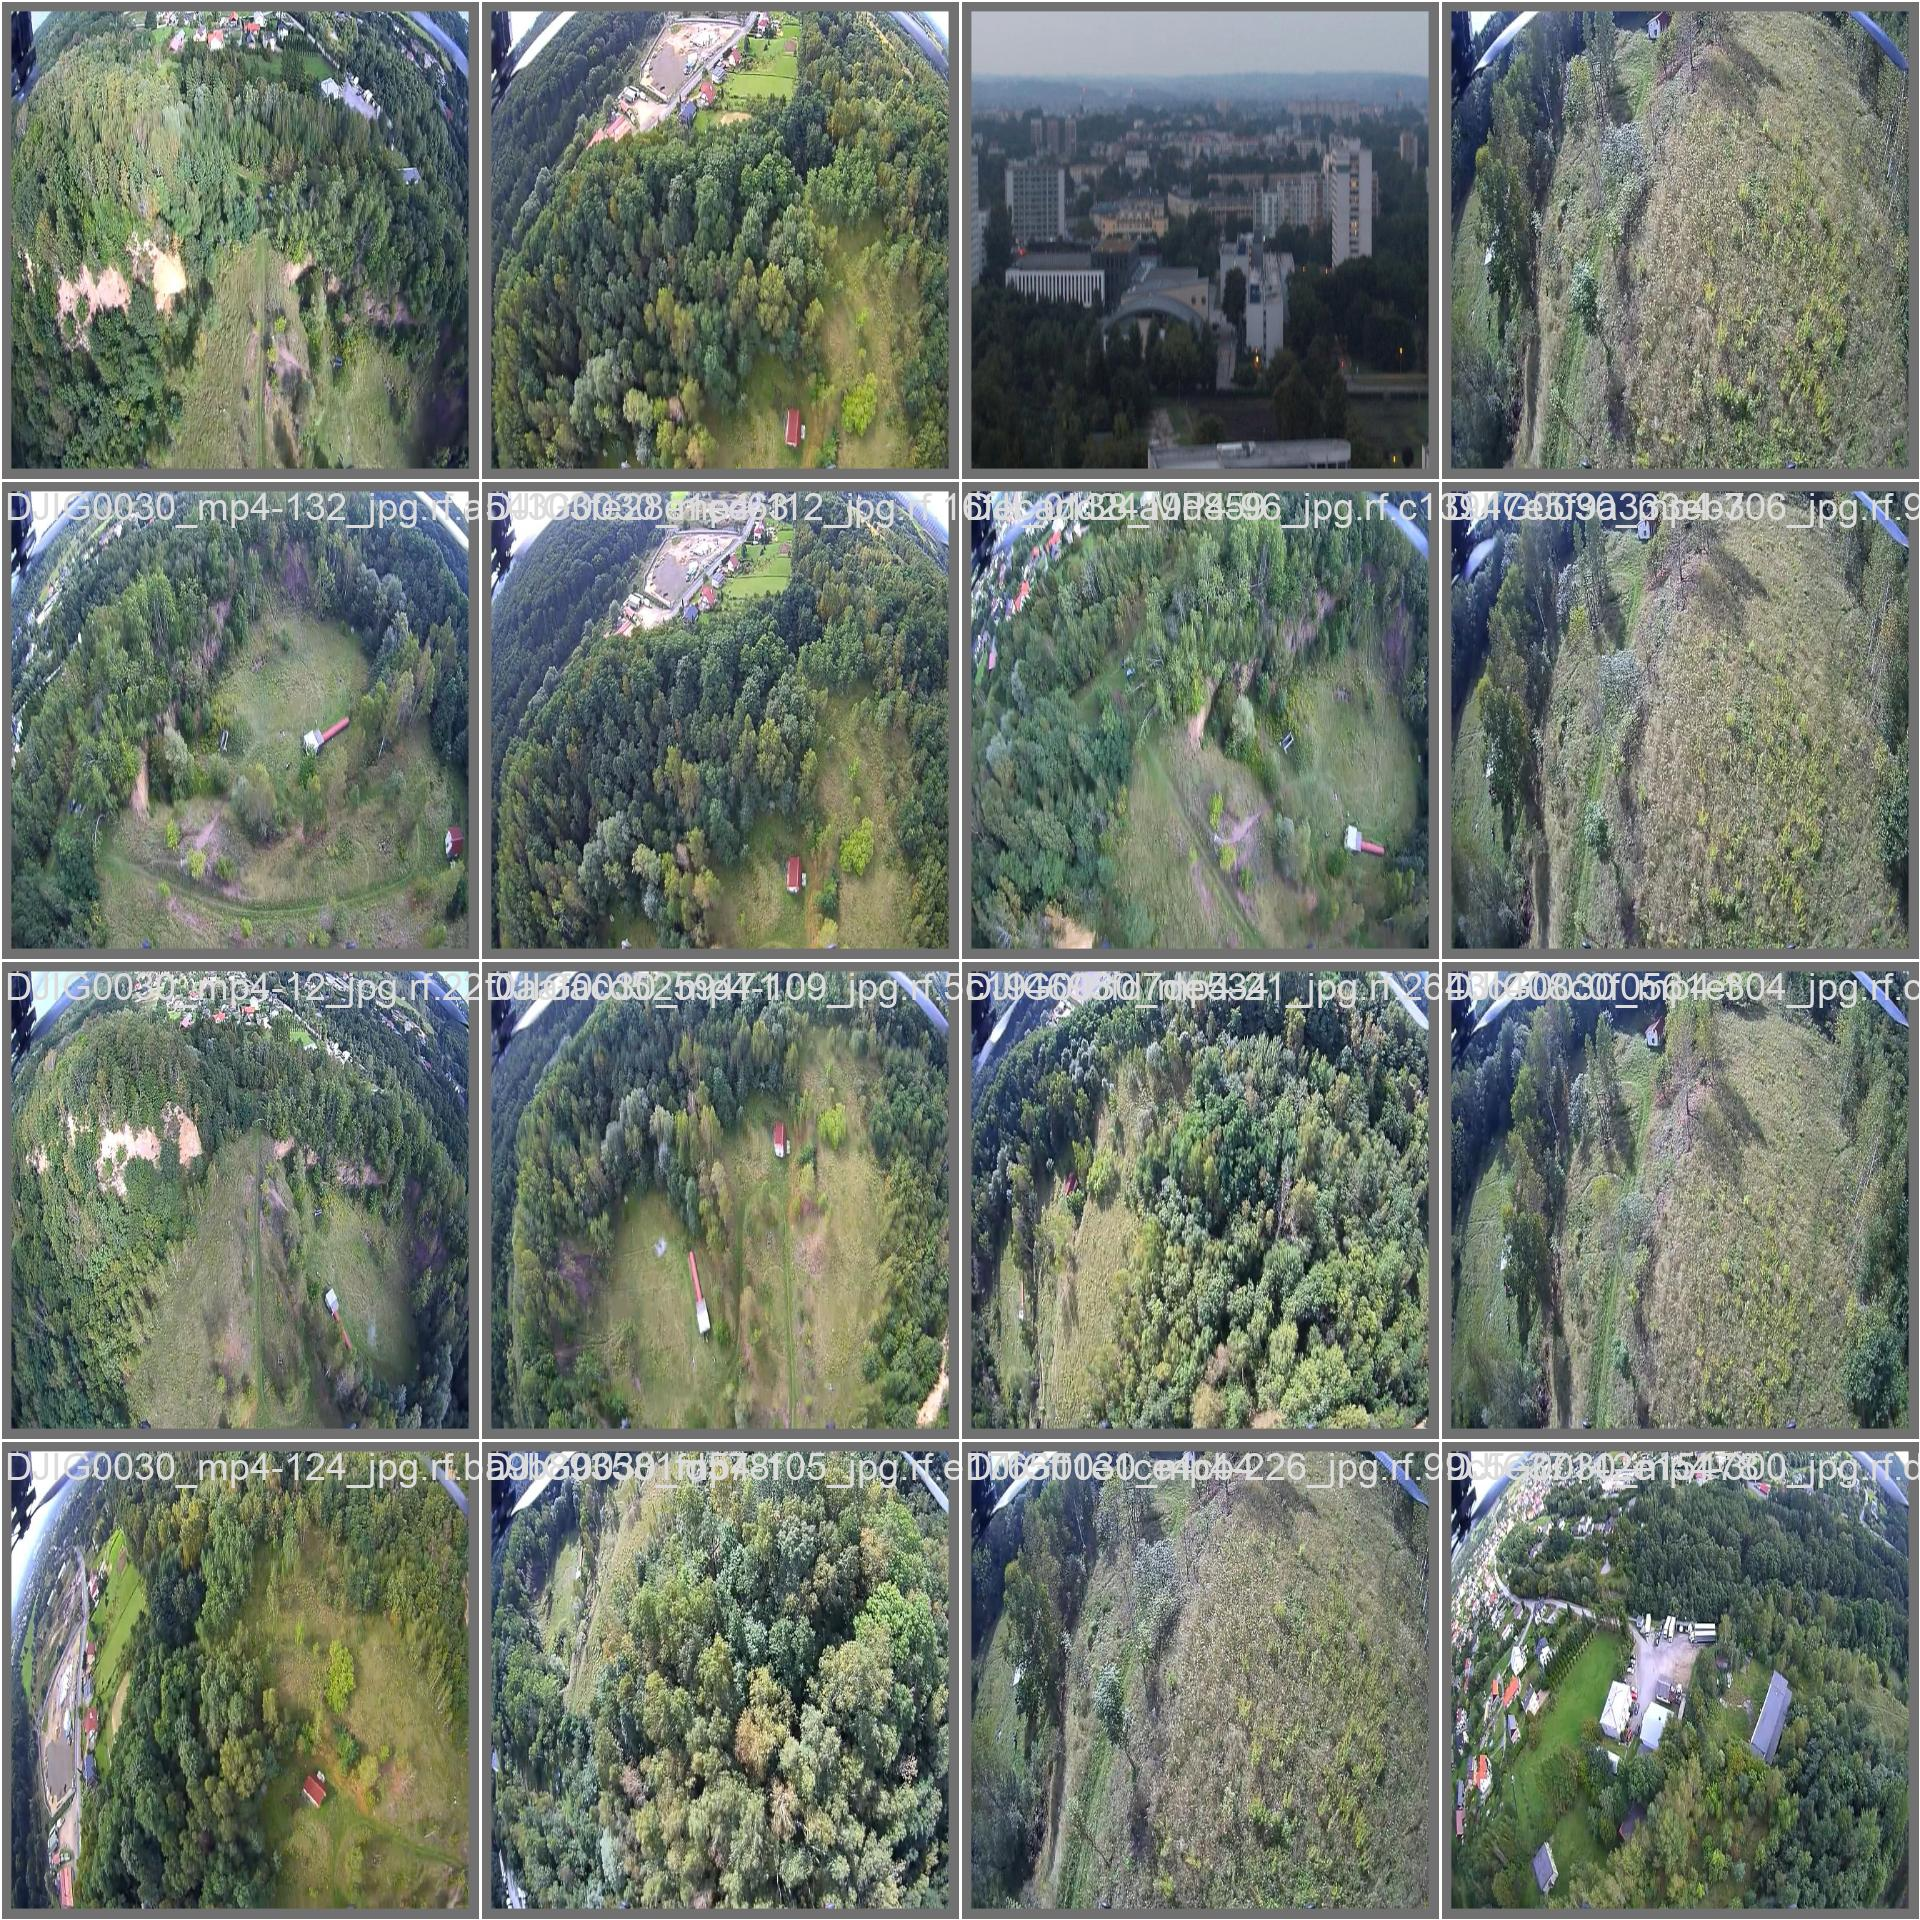

In [22]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch2_pred.jpg', width=750)

In [24]:
%cd {HOME}
!yolo task = detect mode = predict model = {HOME}/runs/detect/train2/weights/best.pt conf = 0.25 source = {dataset.location}/test/images save = True

/content
2024-01-17 12:19:18.201534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 12:19:18.201591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 12:19:18.203103: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 12:19:19.441284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/49 /content/datasets/fire-detection-small-1/test/images/

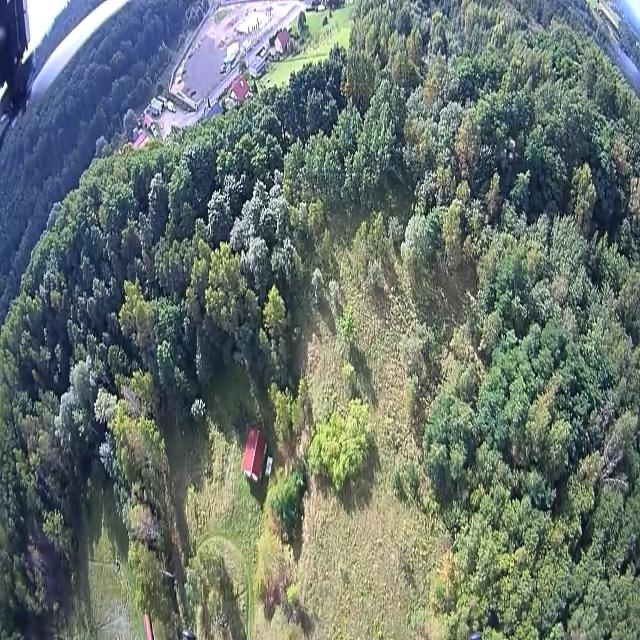

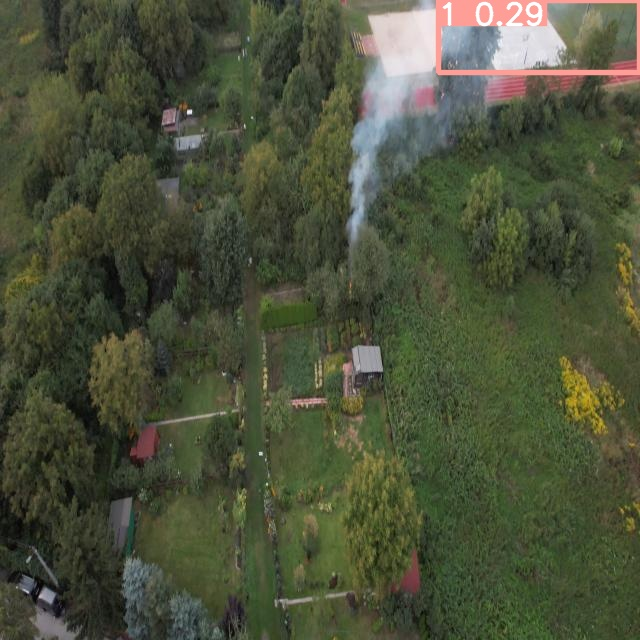

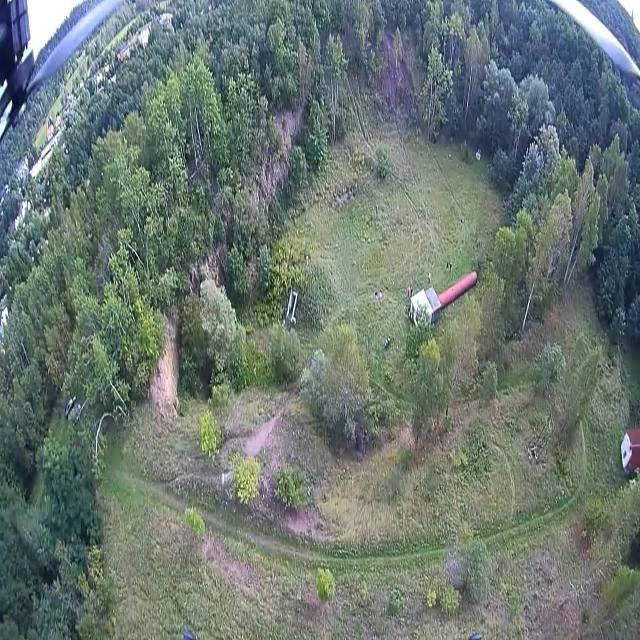

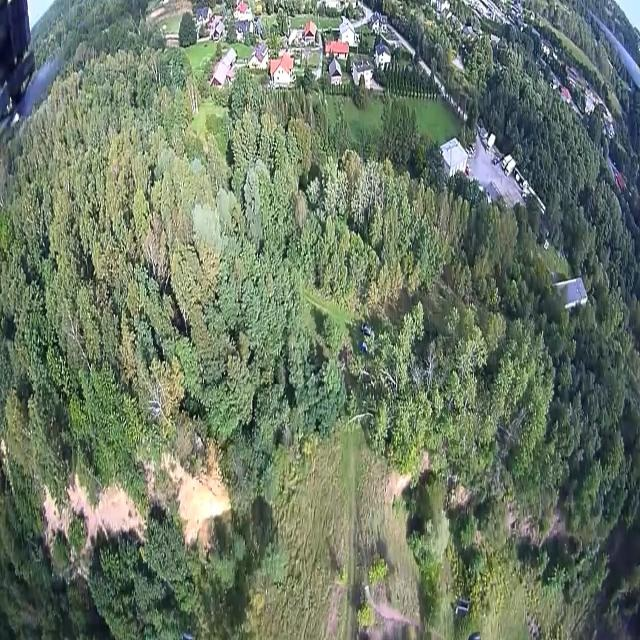

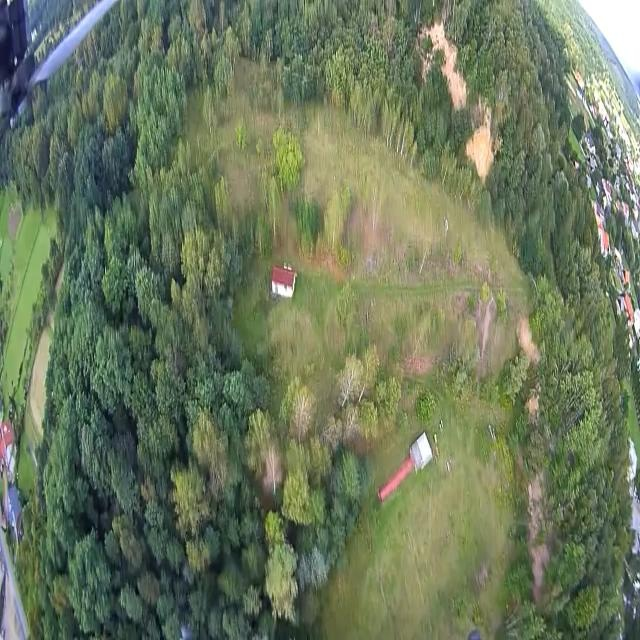

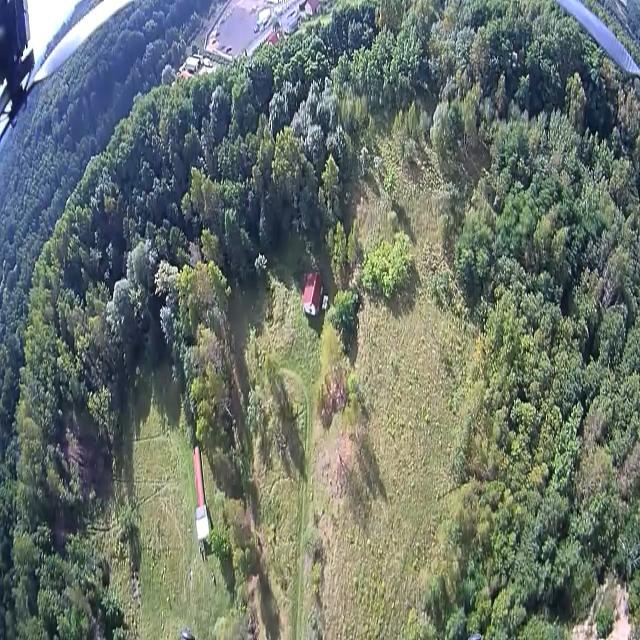

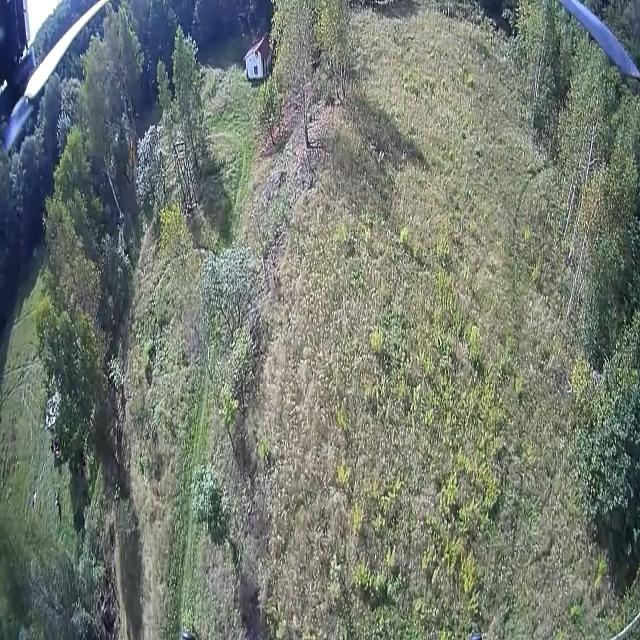

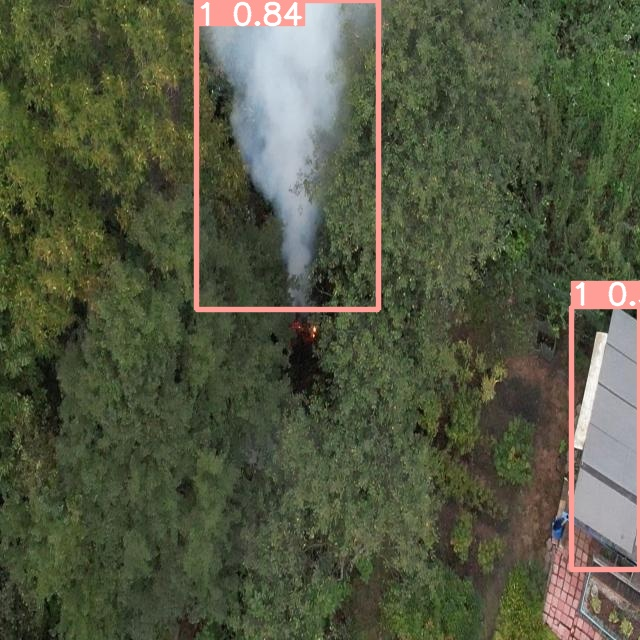

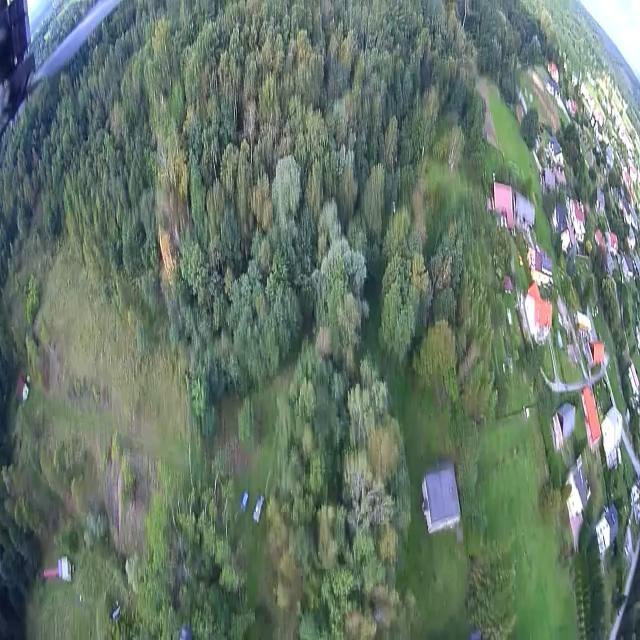

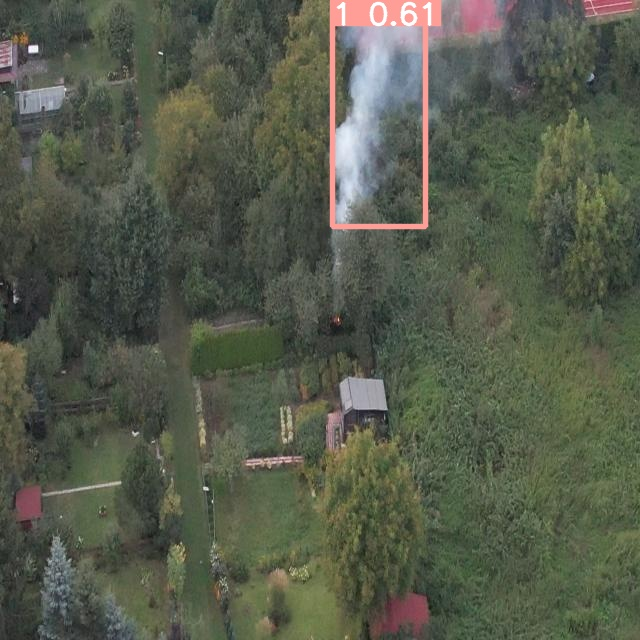

In [25]:
from glob import glob

for rasm_yulagi in glob("/content/runs/detect/predict/*.jpg")[:10]:
  display(Image(filename = rasm_yulagi, width = 600))
  print("\n")